In [1]:
import numpy
import scipy.signal
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = scipy.signal.lti([1], [15, 8, 1])

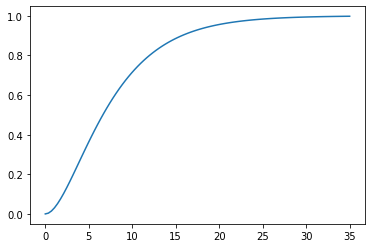

In [3]:
plt.plot(*G.step())

In [4]:
M = 10  # Control horizon
P = 20  # Prediction horizon
DeltaT = 1  # Sampling rate

In [5]:
tcontinuous = numpy.linspace(0, P*DeltaT, 1000)  # some closely spaced time points
tpredict = numpy.arange(0, P*DeltaT, DeltaT)   # discrete points at prediction horizon

In [6]:
tcontinuous

array([ 0.        ,  0.02002002,  0.04004004,  0.06006006,  0.08008008,
        0.1001001 ,  0.12012012,  0.14014014,  0.16016016,  0.18018018,
        0.2002002 ,  0.22022022,  0.24024024,  0.26026026,  0.28028028,
        0.3003003 ,  0.32032032,  0.34034034,  0.36036036,  0.38038038,
        0.4004004 ,  0.42042042,  0.44044044,  0.46046046,  0.48048048,
        0.5005005 ,  0.52052052,  0.54054054,  0.56056056,  0.58058058,
        0.6006006 ,  0.62062062,  0.64064064,  0.66066066,  0.68068068,
        0.7007007 ,  0.72072072,  0.74074074,  0.76076076,  0.78078078,
        0.8008008 ,  0.82082082,  0.84084084,  0.86086086,  0.88088088,
        0.9009009 ,  0.92092092,  0.94094094,  0.96096096,  0.98098098,
        1.001001  ,  1.02102102,  1.04104104,  1.06106106,  1.08108108,
        1.1011011 ,  1.12112112,  1.14114114,  1.16116116,  1.18118118,
        1.2012012 ,  1.22122122,  1.24124124,  1.26126126,  1.28128128,
        1.3013013 ,  1.32132132,  1.34134134,  1.36136136,  1.38

In [7]:
tpredict

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [8]:
tau_c = 1
r = 1 - numpy.exp(-tpredict/tau_c)

In [9]:
r

array([0.        , 0.63212056, 0.86466472, 0.95021293, 0.98168436,
       0.99326205, 0.99752125, 0.99908812, 0.99966454, 0.99987659,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999])

In [10]:
u = numpy.ones(M)

In [12]:
u

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
x0 = numpy.zeros(G.to_ss().A.shape[0])

In [18]:
def extend(u):
    """We optimise the first M values of u but we need P values for prediction"""
    return numpy.concatenate([u, numpy.repeat(u[-1], P-M)])

In [19]:
def prediction(u, t=tpredict, x0=x0):
    """Predict the effect of an input signal"""
    t, y, x = scipy.signal.lsim(G, u, t, X0=x0, interp=False)
    return y

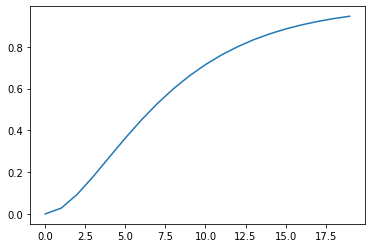

In [20]:
plt.plot(tpredict, prediction(extend(u)))

In [23]:
def objective(u, x0=x0):
    """Calculate the sum of the square error for the cotnrol problem"""
    y = prediction(extend(u))
    return sum((r - y)**2)

In [24]:
result = scipy.optimize.minimize(objective, u)
uopt = result.x
result.fun

0.0009187721940138631

In [25]:
ucont = extend(uopt)[((tcontinuous-0.01)//DeltaT).astype(int)]

In [26]:
def plotoutput(ucont, uopt):
    plt.figure()
    plt.plot(tcontinuous, ucont)
    plt.xlim([0, DeltaT*(P+1)])
    plt.figure()
    plt.plot(tcontinuous, prediction(ucont, tcontinuous), label='Continuous response')
    plt.plot(tpredict, prediction(extend(uopt)), '-o', label='Optimized response')
    plt.plot(tpredict, r, label='Set point')
    plt.legend()

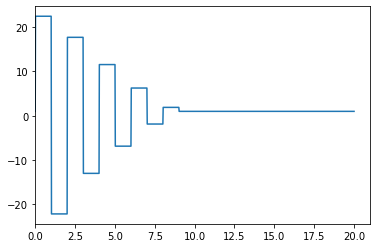

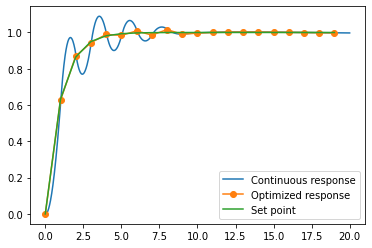

In [27]:
plotoutput(ucont, uopt)